# <center> Projet final - Investissements et produits financiers </center>

##### <center> Dylan MARCHI et Nono-Armel TCHIASSO </center>

### 1. Marches aléatoires

La variance du portefeuille est de 1.0%


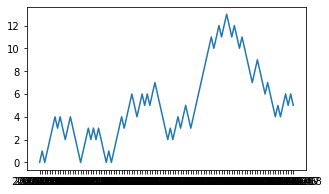

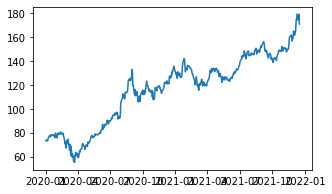

[144, 200, 184, 206, 164]


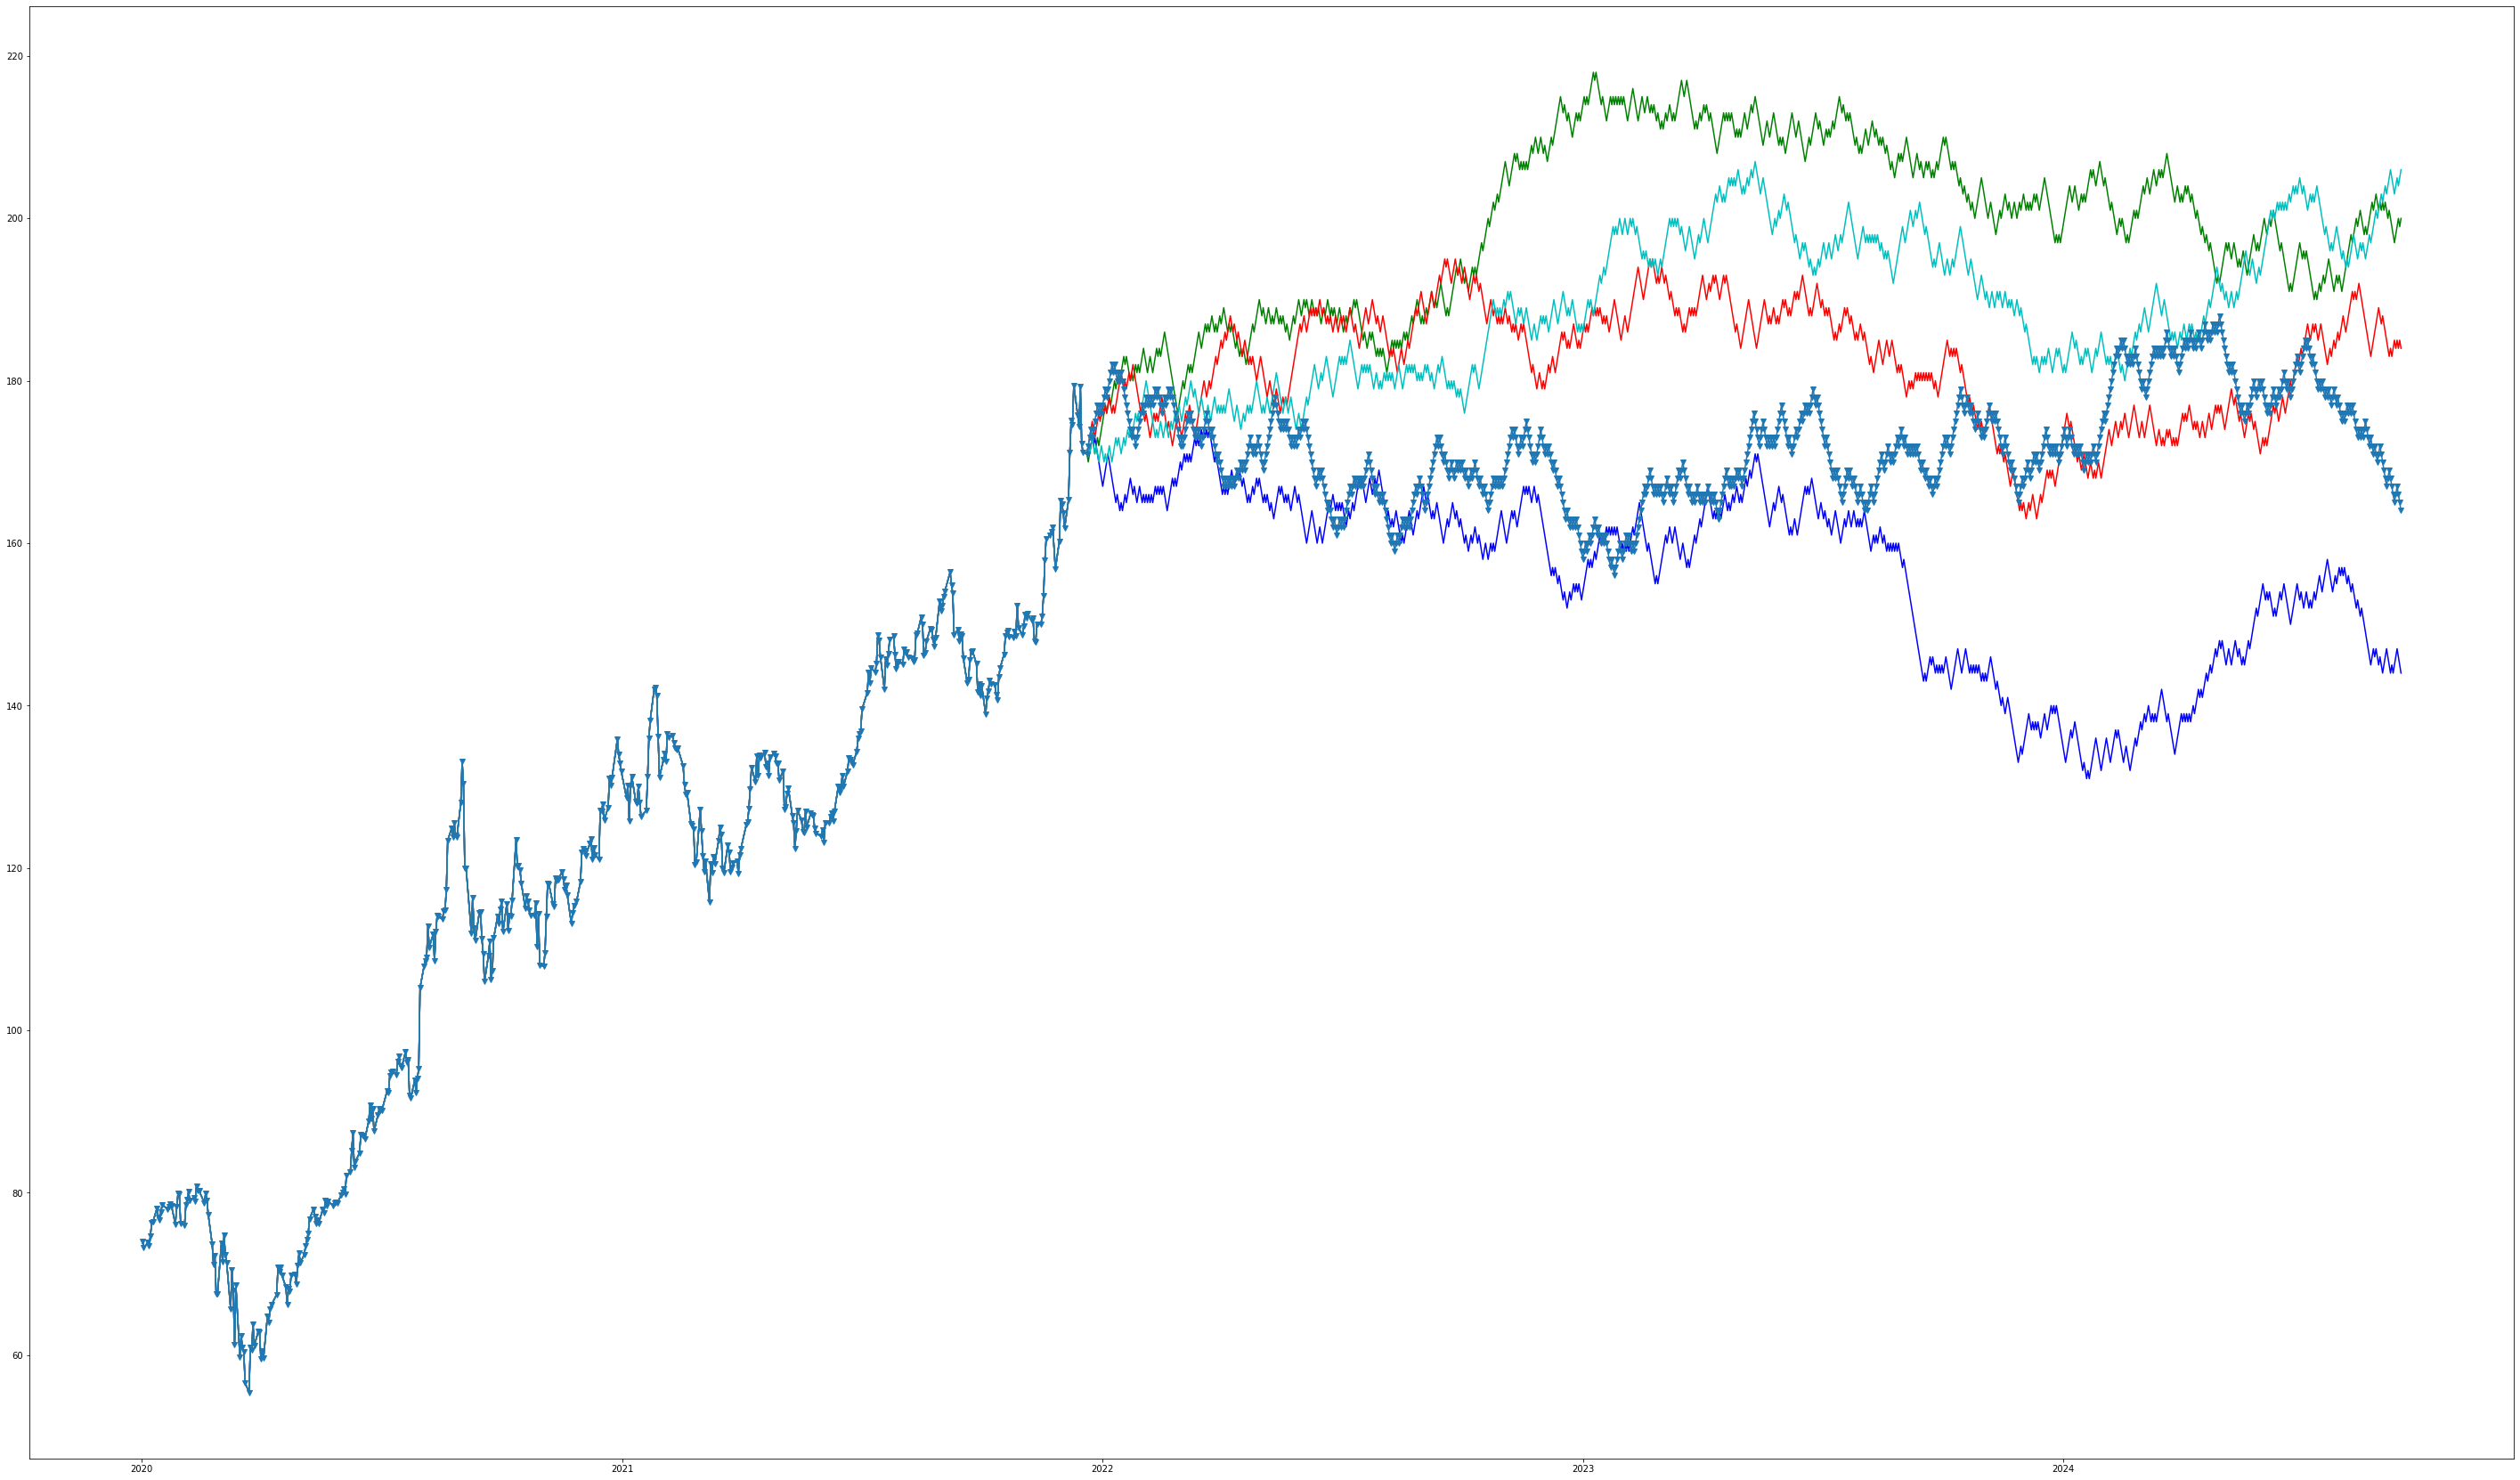

In [8]:
######## Marches aléatoires ##########
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from datetime import date
from datetime import timedelta, date
from yahoofinancials import YahooFinancials
from random import randint
import pandas_datareader as web
import numpy as np

class marche_aleatoire:

    ticker = "AAPL"
    data = pd.DataFrame()
    data[ticker] = web.DataReader(ticker, data_source = 'yahoo', 
                                start = "2020-01-01", 
                                end = "today")['Adj Close']
    data = data.dropna()

    last_value_walk = []
    y_aapl = []
    # Data Column Index to List of Date
    price_list = data.values.tolist()
    
    for sublist in price_list:
        for val in sublist:
            y_aapl.append(val)
    
    def marche(self, valprec):
        if(valprec == 0):
            return valprec+1
        value = randint(valprec-1,valprec+1)
        while(value == valprec):
            value = self.marche(valprec)
        return value

    def initialize_marche(self, nb, debut=0):
        list_market = []
        list_market.append(debut)
        
        for i in range(nb):
            value = self.marche(list_market[i])
            if(value < 0):
                list_market.append(0)
            else:
                list_market.append(value)
        return list_market

    def initialize_marche2(self, debut=0):
        list_market = []
        list_market.append(debut)
        
        for i in range(999):
            value = self.marche(list_market[i])
            if(value < 0):
                list_market.append(0)
            else:
                list_market.append(value)
        return list_market

    def daterange(self, start_date, end_date):
        for n in range(int ((end_date - start_date).days)):
            yield start_date + timedelta(n)

    def generate_list_date(self, start_date, end_date):
        list_date = []
        i = 0

        for single_date in self.daterange(start_date, end_date):
            i += 1
            list_date.append(single_date.strftime("%Y-%m-%d"))
            if(i == 100):
                return list_date

    def generate_list_date2(self, start_date, end_date):
        list_date = []
        i = 0

        for single_date in self.daterange(start_date, end_date):
            i += 1
            list_date.append(single_date.strftime("%Y-%m-%d"))
            if(i == 1000):
                return list_date

    def affichage_100_marches_aleatoires(self):
        x = self.generate_list_date(date(2021, 3, 1), date.today())
        y = self.initialize_marche(99)
        plt.figure(1, figsize=(5, 3))
        plt.plot(x,y)
        plt.show()

    def affichage_val_hist_appl(self, data):
        # Valeurs historiques AAPL 
        plt.figure(1, figsize=(5, 3))
        plt.plot(data)
        plt.show()

    def generate_aapl_market(self, y_aapl, data):
        today = datetime.date.today()
        yesterday = today - datetime.timedelta(days = 1)
        tomorrow = today + datetime.timedelta(days = 1)

        x_generate = self.generate_list_date2(tomorrow, date(2030, 1, 1))
        axe_x = data.index.tolist() + x_generate
        y_generate = self.initialize_marche2(int(y_aapl[-1]))
        axe_y = y_aapl + y_generate
        return axe_x, axe_y

    def affichage_valhist_marche(self, y_aapl, data, last_value_walk):
        color_list = ['b-', 'g-', 'r-', 'c-', 'v-']
        for i in range(5):
            axe_x, axe_y = self.generate_aapl_market(y_aapl, data)
            plt.figure(1, figsize=(50, 30))
            plt.plot(axe_x,axe_y, color_list[i])
            last_value_walk.append(axe_y[-1])
        print(last_value_walk)
        plt.show()

if __name__ == '__main__':

    m_a = marche_aleatoire()
    
    # Log Return
    log_returns = np.log(1 + m_a.data.pct_change())
    # Affichage de la fin du tableau
    log_returns.tail()

    # Variance 
    weight = np.array([0.25])
    pfolio_var = round(np.dot(weight.T, np.dot(log_returns.cov()*250, weight)),2)
    print("La variance du portefeuille est de " + str(pfolio_var*100) + str("%"))

    # Affichage des 100 marches aleatoires
    m_a.generate_list_date(start_date = date(2021, 3, 1), end_date = date.today())
    m_a.affichage_100_marches_aleatoires()

    # Affichage valeurs historiques AAPL
    m_a.affichage_val_hist_appl(m_a.data)

    # Affichage valeurs historiques AAPL + marches aléatoires à partir de la dernière date de valeurs historiques
    m_a.generate_aapl_market(m_a.y_aapl, m_a.data)
    m_a.affichage_valhist_marche(m_a.y_aapl, m_a.data, m_a.last_value_walk)

### 2. Monte Carlo pour pricing d'options

Current price of AAPL - $171.14
Current price of AAPL - $171.14
MONTE CARLO PLAIN VANILLA CALL OPTION PRICING
Option price:  71.87820626727462
Initial price:  171.14
Strike price:  100
Daily expected drift:  0.16272999999999999 %
Daily expected volatility:  8.8864 %
Total trials:  100000
Zero trials:  12
Percentage of total trials:  0.012 %
[200, 176, 156, 194, 160]


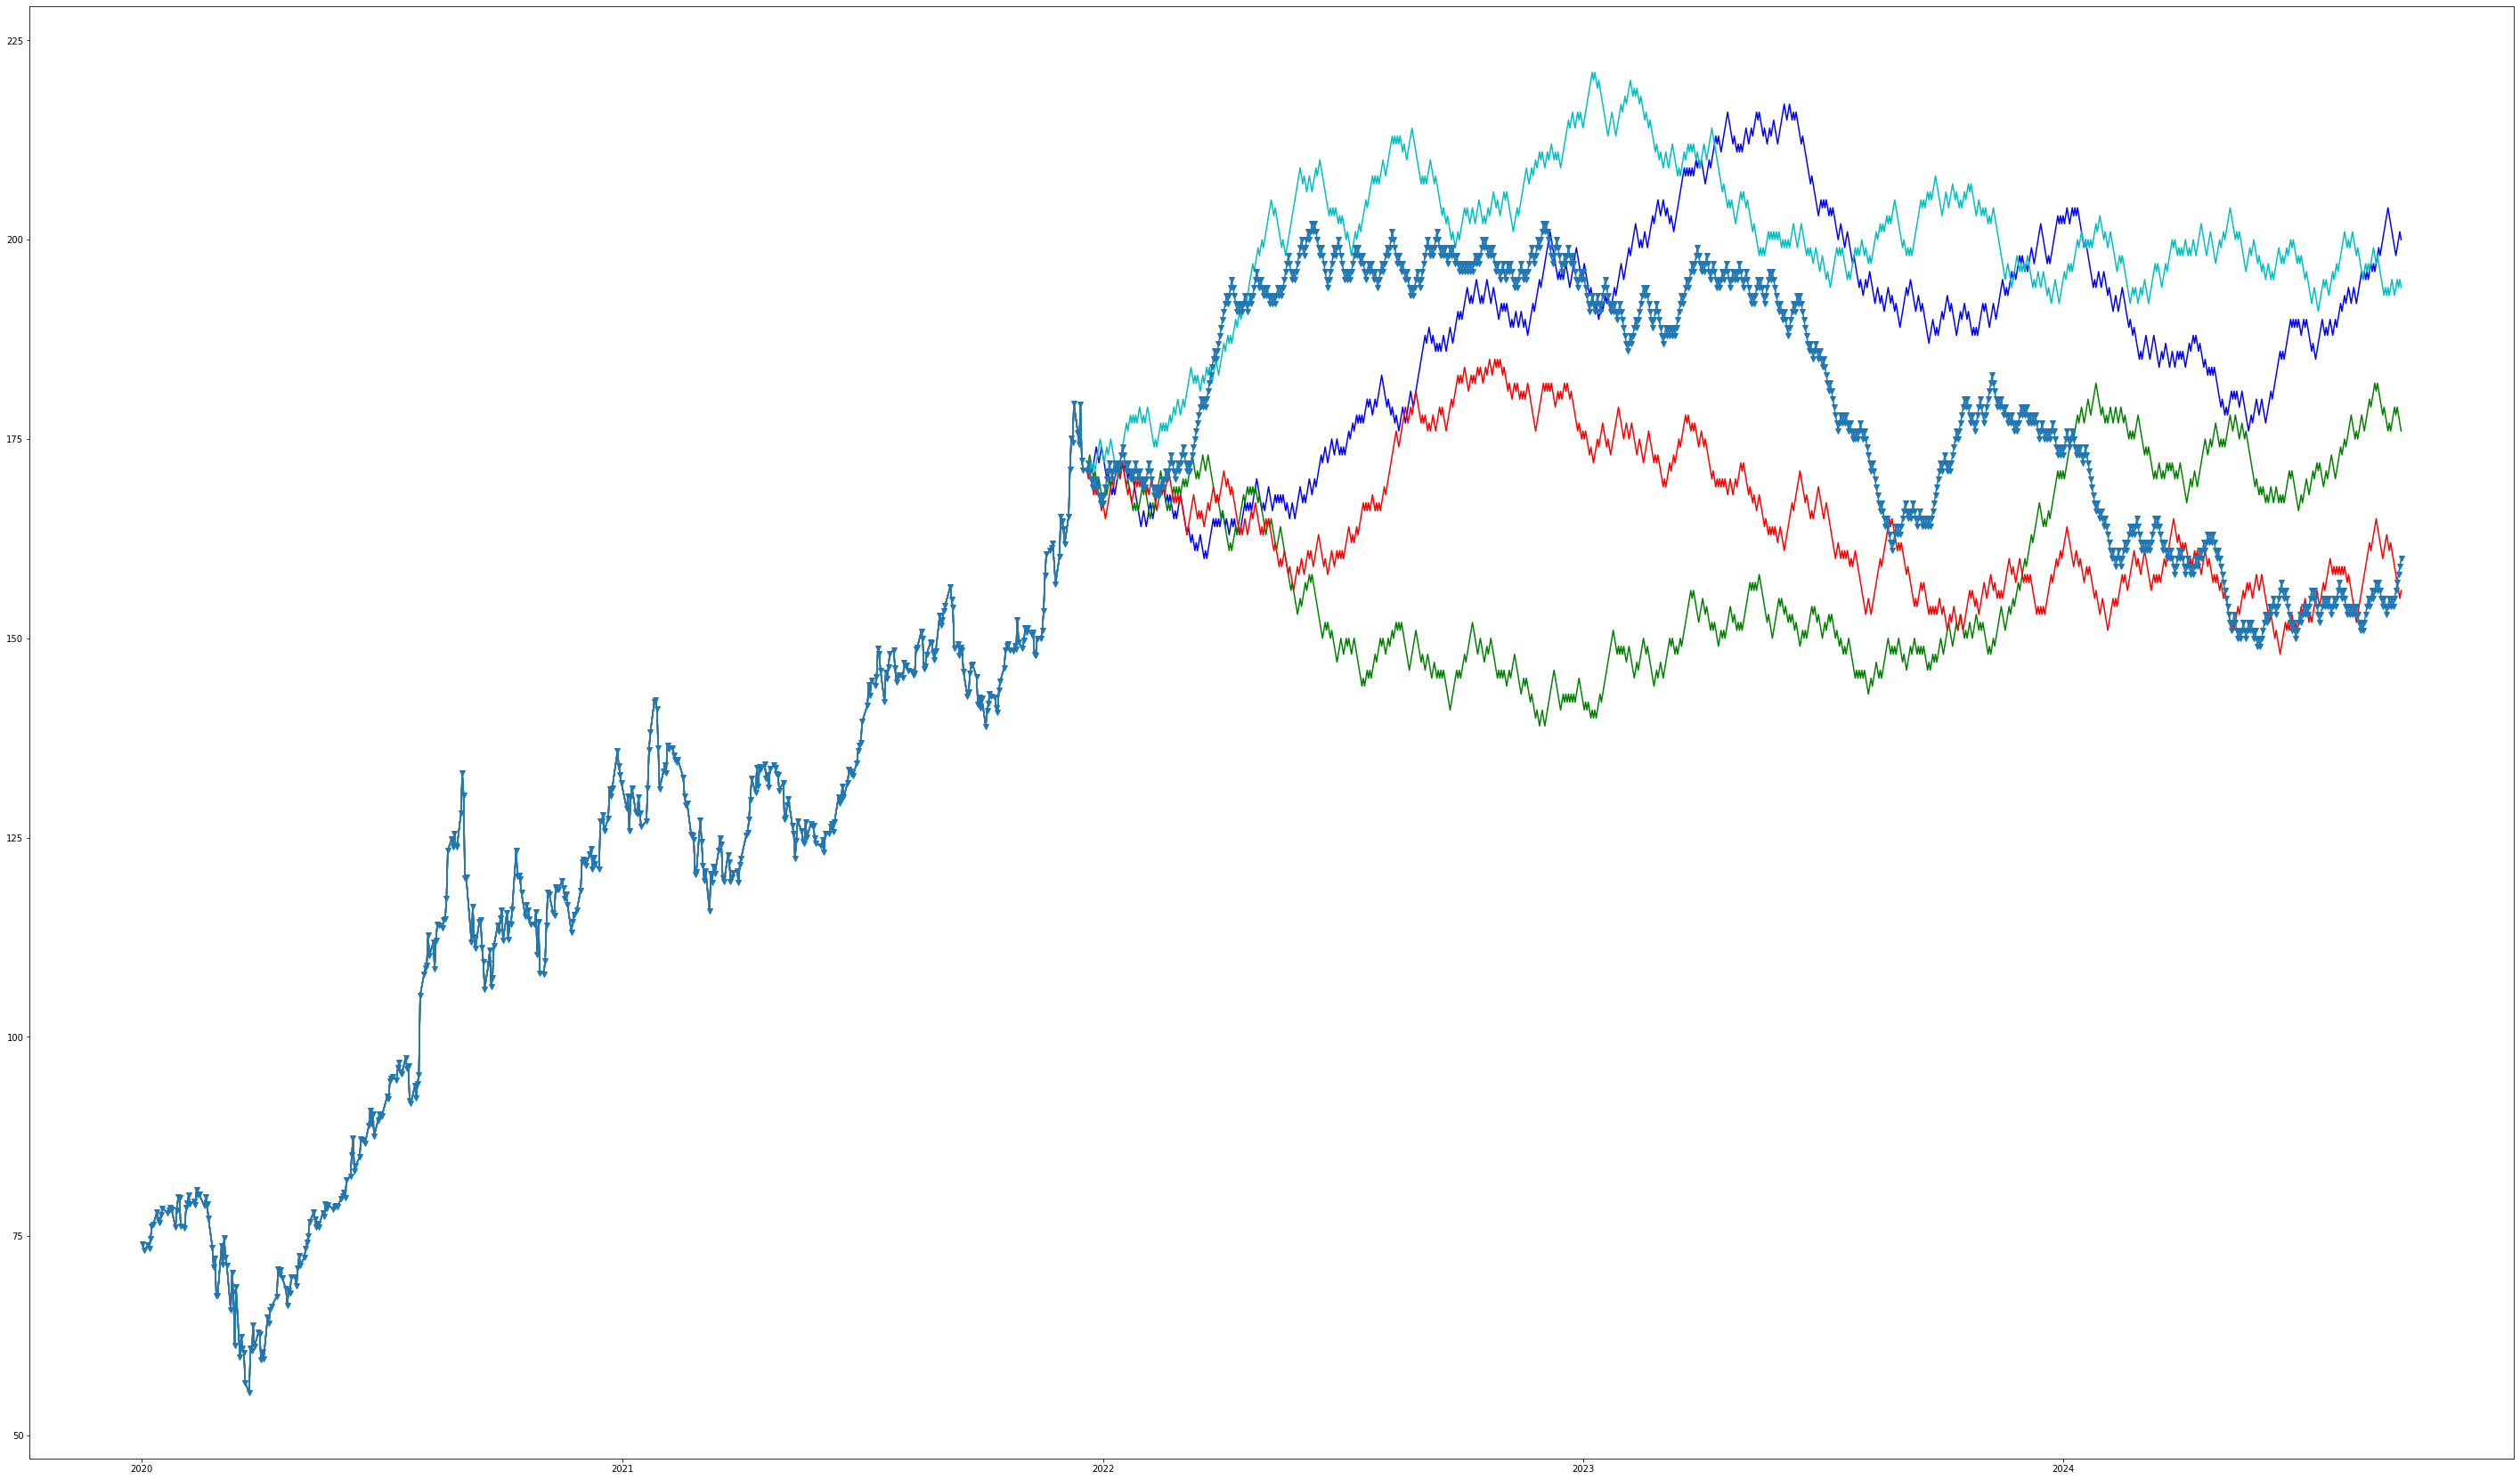

Payoff pour chaque marche générée:  [100, 76, 56, 94, 60]
Moyenne des payoffs calculés:  77.2
Prix de l'option avec Black Scholes:  74.10787439473485


In [9]:
######## Monte Carlo pour princing d'options ##########
import pandas as pd
import datetime
import scipy
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import pandas_datareader as web
import numpy as np

from scipy import stats
from statistics import mean
from datetime import date
from datetime import timedelta, date
from yahoofinancials import YahooFinancials
from random import randint
from marche_aleatoire import *
from surface_volatilite import *


class monte_carlo():
    
    symbol = "AAPL"

    # Create the object representing the symbol of interest
    equity = yf.Ticker(symbol)

    current_price = equity.info['currentPrice']
    print(f"Current price of {symbol} - ${current_price}")

    cdf = stats.norm(0, 1).cdf

    # Optional seed
    np.random.seed(12345678)

    # Parameters
    s0 = current_price	          	# Actual price
    drift = 0.0016273		      # Drift term (daily)
    volatility = 0.088864	  	# Volatility (daily)
    t_ = 365 		            	# Total periods in a year
    r = 0.033 			          # Risk free rate (yearly)
    days = 2			            # Days until option expiration
    N = 100000		          	# Number of Monte Carlo trials
    zero_trials = 0		      	# Number of trials where the option payoff = 0
    k = 100				            # Strike price

    avg = 0			            	# Temporary variable to be assigned to the sum
                                    # of the simulated payoffs
    T = 1                           # maturity T

    # Stocastic walk
    # This function calculates the stochastic integral after periods
    # and returns the final price.
    def stoc_walk(self, p, dr, vol, periods):
        w = np.random.normal(0,1,size=periods)
        for i in range(periods):
            p += dr*p + w[i]*vol*p
        return p
    
    def long_call(self, last_value_walk, k):
    # Long Put Payoff = max(Strike Price - Stock Price, 0)     # If we are long a call, we would only elect to call if the current stock price is greater than     # the strike price on our option
        payoff_list = []     
        for i in range(len(last_value_walk)):
            P = max(last_value_walk[i] - k, 0)
            payoff_list.append(P)
        return payoff_list
    
    # Modèle de Black Scholes
    def d1(self, S, K, T, r, q, o):
        return (np.log(S / K) + ((r-q) + 0.5 * o ** 2) * T) / (o * np.sqrt(T))
    
    def d2(self, S, K, T, r,q, o):
        return self.d1(S, K, T, r,q, o) - o * np.sqrt(T)

    def call(self, S, K, T, r,q, o):
        return S *np.exp(-q*T)* self.cdf(self.d1(S, K, T, r,q, o)) - K * np.exp(-r * T) * self.cdf(self.d2(S, K, T, r,q, o))
   
if __name__ == '__main__':

    m_a = marche_aleatoire()
    monte_carlo = monte_carlo()

    # Simulation loop
    for i in range(monte_carlo.N):
        temp = monte_carlo.stoc_walk(monte_carlo.s0,monte_carlo.drift,monte_carlo.volatility,monte_carlo.days)
        if temp > monte_carlo.k:
            payoff = temp-monte_carlo.k
            payoff = payoff*np.exp(-monte_carlo.r/monte_carlo.t_*monte_carlo.days)
            monte_carlo.avg += payoff
        else:
            monte_carlo.zero_trials += 1

    # Averaging the payoffs
    price = monte_carlo.avg/float(monte_carlo.N)

    # Priting the results
    print("MONTE CARLO PLAIN VANILLA CALL OPTION PRICING")
    print("Option price: ",price)
    print("Initial price: ",monte_carlo.s0)
    print("Strike price: ",monte_carlo.k)
    print("Daily expected drift: ",monte_carlo.drift*100,"%")
    print("Daily expected volatility: ",monte_carlo.volatility*100,"%")
    print("Total trials: ",monte_carlo.N)
    print("Zero trials: ",monte_carlo.zero_trials)
    print("Percentage of total trials: ",monte_carlo.zero_trials/monte_carlo.N*100,"%")   

    # Marches aleatoires d'Apple générées d'ajd à date de maturité de l'option
    last_value_walk = marche_aleatoire.last_value_walk
    data = marche_aleatoire.data
    y_aapl = marche_aleatoire.y_aapl
    m_a.generate_aapl_market(y_aapl, data)
    m_a.affichage_valhist_marche(y_aapl, data, last_value_walk)

    # Calcul du payoff pour chaque marche aleatoire
    payoff_marche = monte_carlo.long_call(last_value_walk, monte_carlo.k)
    print("Payoff pour chaque marche générée: ",payoff_marche)
    # Moyenne des payoffs calculés
    print("Moyenne des payoffs calculés: ",mean(payoff_marche))

    # Calcul du prix de l'option avec le modèle Black Scholes
    C = monte_carlo.call(monte_carlo.s0, monte_carlo.k, monte_carlo.T, monte_carlo.r, monte_carlo.drift, monte_carlo.volatility)
    print("Prix de l'option avec Black Scholes: ", C)




### 3. Surface de volatilité

In [10]:
import pandas as pd
import datetime
import scipy
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import pandas_datareader as web
import numpy as np

from scipy.stats import norm
from scipy import stats
from statistics import mean
from datetime import date
from datetime import timedelta, date
from yahoofinancials import YahooFinancials
from random import randint
from monte_carlo import *
from pandas_datareader.data import Options
from dateutil.parser import parse
from datetime import datetime
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
from functools import partial
from scipy import optimize
import numpy as np
from scipy.interpolate import griddata

class surface_volatilite():

    N_prime = norm.pdf
    N = norm.cdf

    def black_scholes_call(self, S, K, T, r, vol):
        '''
        :param S: Asset price
        :param K: Strike price
        :param T: Time to maturity
        :param r: risk-free rate (treasury bills)
        :param sigma: volatility
        :return: call price
        '''
        d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
        d2 = d1 - vol * np.sqrt(T)
        return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

    def bs_vega(self, S, K, T, r, sigma):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        return S * norm.pdf(d1) * np.sqrt(T)

    def find_vol(self, target_value, S, K, T, r):
        MAX_ITERATIONS = 200
        PRECISION = 1.0e-5
        sigma = 0.5
        for i in range(0, MAX_ITERATIONS):
            price = self.black_scholes_call(S, K, T, r, sigma)
            vega = self.bs_vega(S, K, T, r, sigma)
            diff = target_value - price  # our root
            if (abs(diff) < PRECISION):
                return sigma
            sigma = sigma + diff/vega # f(x) / f'(x)
        return sigma

    def plot3D(self,X,Y,Z):
        fig = plt.figure()
        ax = Axes3D(fig, azim = -29, elev = 50)
        ax.plot(X,Y,Z,'o')
        plt.xlabel("expiry")
        plt.ylabel("strike")
        plt.show()

if __name__ == '__main__':

    s_v = surface_volatilite()
    m_t = monte_carlo()

    # On prend trois option call européenne
    first_call = s_v.black_scholes_call(m_t.s0,150,1,m_t.r,m_t.volatility)
    second_call = s_v.black_scholes_call(m_t.s0,120,6,m_t.r,m_t.volatility)
    third_call = s_v.black_scholes_call(m_t.s0,220,5,m_t.r,m_t.volatility)

    # Calcul de la volatilité implicite pour chaque option
    #V_market = bs_call(S, K, T, r, vol)
    #implied_vol = find_vol(V_market, S, K, T, r)

    implied_vol_1 = s_v.find_vol(first_call,m_t.s0,150,1,m_t.r)
    implied_vol_2 = s_v.find_vol(second_call,m_t.s0,120,6,m_t.r)
    implied_vol_3 = s_v.find_vol(third_call,m_t.s0,200,5,m_t.r)

    print ('Implied vol for first call : %.2f%%' % (implied_vol_1 * 100))
    print ('Implied vol for second call : %.2f%%' % (implied_vol_2 * 100))
    print ('Implied vol for third call : %.2f%%' % (implied_vol_3 * 100))




Implied vol for first call : 8.89%
Implied vol for second call : 8.89%
Implied vol for third call : 4.58%
